# **Decision Tree Regression**

Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs and utility.
Decision-tree algorithms fall under the category of supervised learning algorithms.

Decision tree analysis is a predictive modelling tool that can be applied across many areas. Decision trees can be constructed by an algorithmic approach that can split the dataset in different ways based on different conditions. Decision trees are the most powerful algorithms that fall under the category of supervised algorithms.

They can be used for both classification and regression tasks. The two main entities of a tree are decision nodes, where the data is split and leaves, where we get outcome.

**Simple example of a decision tree:**

![alt text](https://lh3.googleusercontent.com/Knu4V04Wo27hsE47luJ1YXhv93j6SaTAGa3NaWyHnWMgP7xIKb02OIpjmoYwtnfYuf0VLeq7hR0-zB6GE7kOQN32tLeGhCfjlMbB14kunbLT6msVpIvMwSTE4XmUGOjfgSYBwSKP)



In [225]:
import pandas as pd

In [226]:
data=pd.read_excel("linear_regression/salary_data.xlsx")

<Axes: xlabel='YearsExperience', ylabel='Salary'>

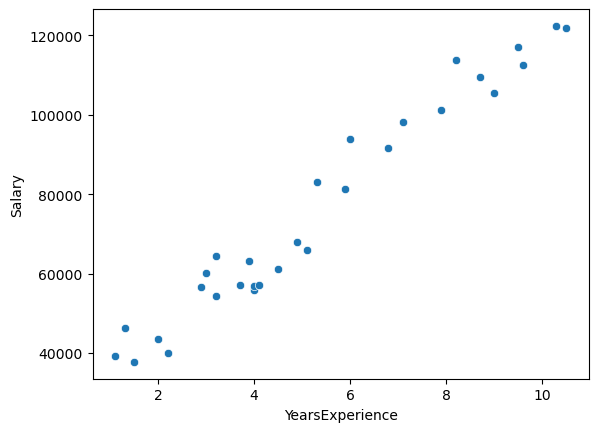

In [227]:
import seaborn as sns
sns.scatterplot(data=data ,x="YearsExperience",y="Salary")

Here,
- Input variable (X) = Experience
- Output variable (Y) = Salary

**STEP 1: Select any column (Axis) from the input variable.**

Here, we have only one column in the input variable so we have to choose Experience as the axis.

Here, AXIS = EXPERIENCE

**Step 2 : From the column that has been selected as the axis in the step 1 , select any value between the maximum and the minimum value.**

Here, the minimum value is 1.1 and the maximum value is 10.5

We can choose any value between the min and max. Here we choode 5.9.

**Step 3: Divide the data along the point choosen.**

![alt text](https://lh6.googleusercontent.com/CQwj3IzHzkTWTfpDI5gefDiaeGCzMfQkUORhOSt4KDi9CxfE70flSMUqiK7tm-jak-BV45gCcifTViBp1Fz7_zXhW93d9JWhYvxvXSFdwP4WPQV94w0JjC7iMd64g9drz9a1SJ33)

**Step 4: Choose the Splitting Criteria.**

If the number of data points is more than the splitting criteria we will divide the data further, if it is not we will not divide the part further.
Here we choose the splitting criteria as 7.
Only if there are more than 7 data points in a group we will split it further.

![alt text](https://docs.google.com/drawings/u/0/d/syczmse4lQTeFuA71O9BvtQ/image?w=305&h=95&rev=71&ac=1&parent=1WfZW_rSLHeG_mOSQECzu_fdt8AKugxNQODyDJVwsRGU)

**Step 5: repeat step 2 to 4 Till the splitting crieta is satisfied.**

![alt text](https://docs.google.com/drawings/u/0/d/sNNSerAxRH3TIdM-wAUNcNQ/image?w=611&h=233&rev=346&ac=1&parent=1WfZW_rSLHeG_mOSQECzu_fdt8AKugxNQODyDJVwsRGU)

In [228]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [229]:
x=data.iloc[:,0:1]
y=data.iloc[:,1:2]

In [230]:
x.values.ravel()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [231]:
y.values.ravel()

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [232]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer()
impute.fit(x)
x=impute.transform(x)

In [233]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='squared_error')

In [234]:
dtr.fit(x,y)

DecisionTreeRegressor()

In [235]:
dtr.score(x,y)

0.9976748641432848

In [236]:
newdata=pd.DataFrame({"YearsExperience": [3.5,4.2,5.7,8.6,10.3]})
newdata

,YearsExperience
0,3.5
1,4.2
2,5.7
3,8.6
4,10.3


In [237]:
newdata=impute.transform(newdata)
y_pred=dtr.predict(newdata)
y_pred

array([ 57189.,  57081.,  81363., 109431., 122391.])

In [238]:
dtr.feature_importances_

array([1.])

In [239]:
i=0
for data in [[3.4],[4.2],[5.7]]:
    print("Predicted salaray for ", data, "is ",y_pred[i])
    i=i+1

Predicted salaray for  [3.4] is  57189.0
Predicted salaray for  [4.2] is  57081.0
Predicted salaray for  [5.7] is  81363.0


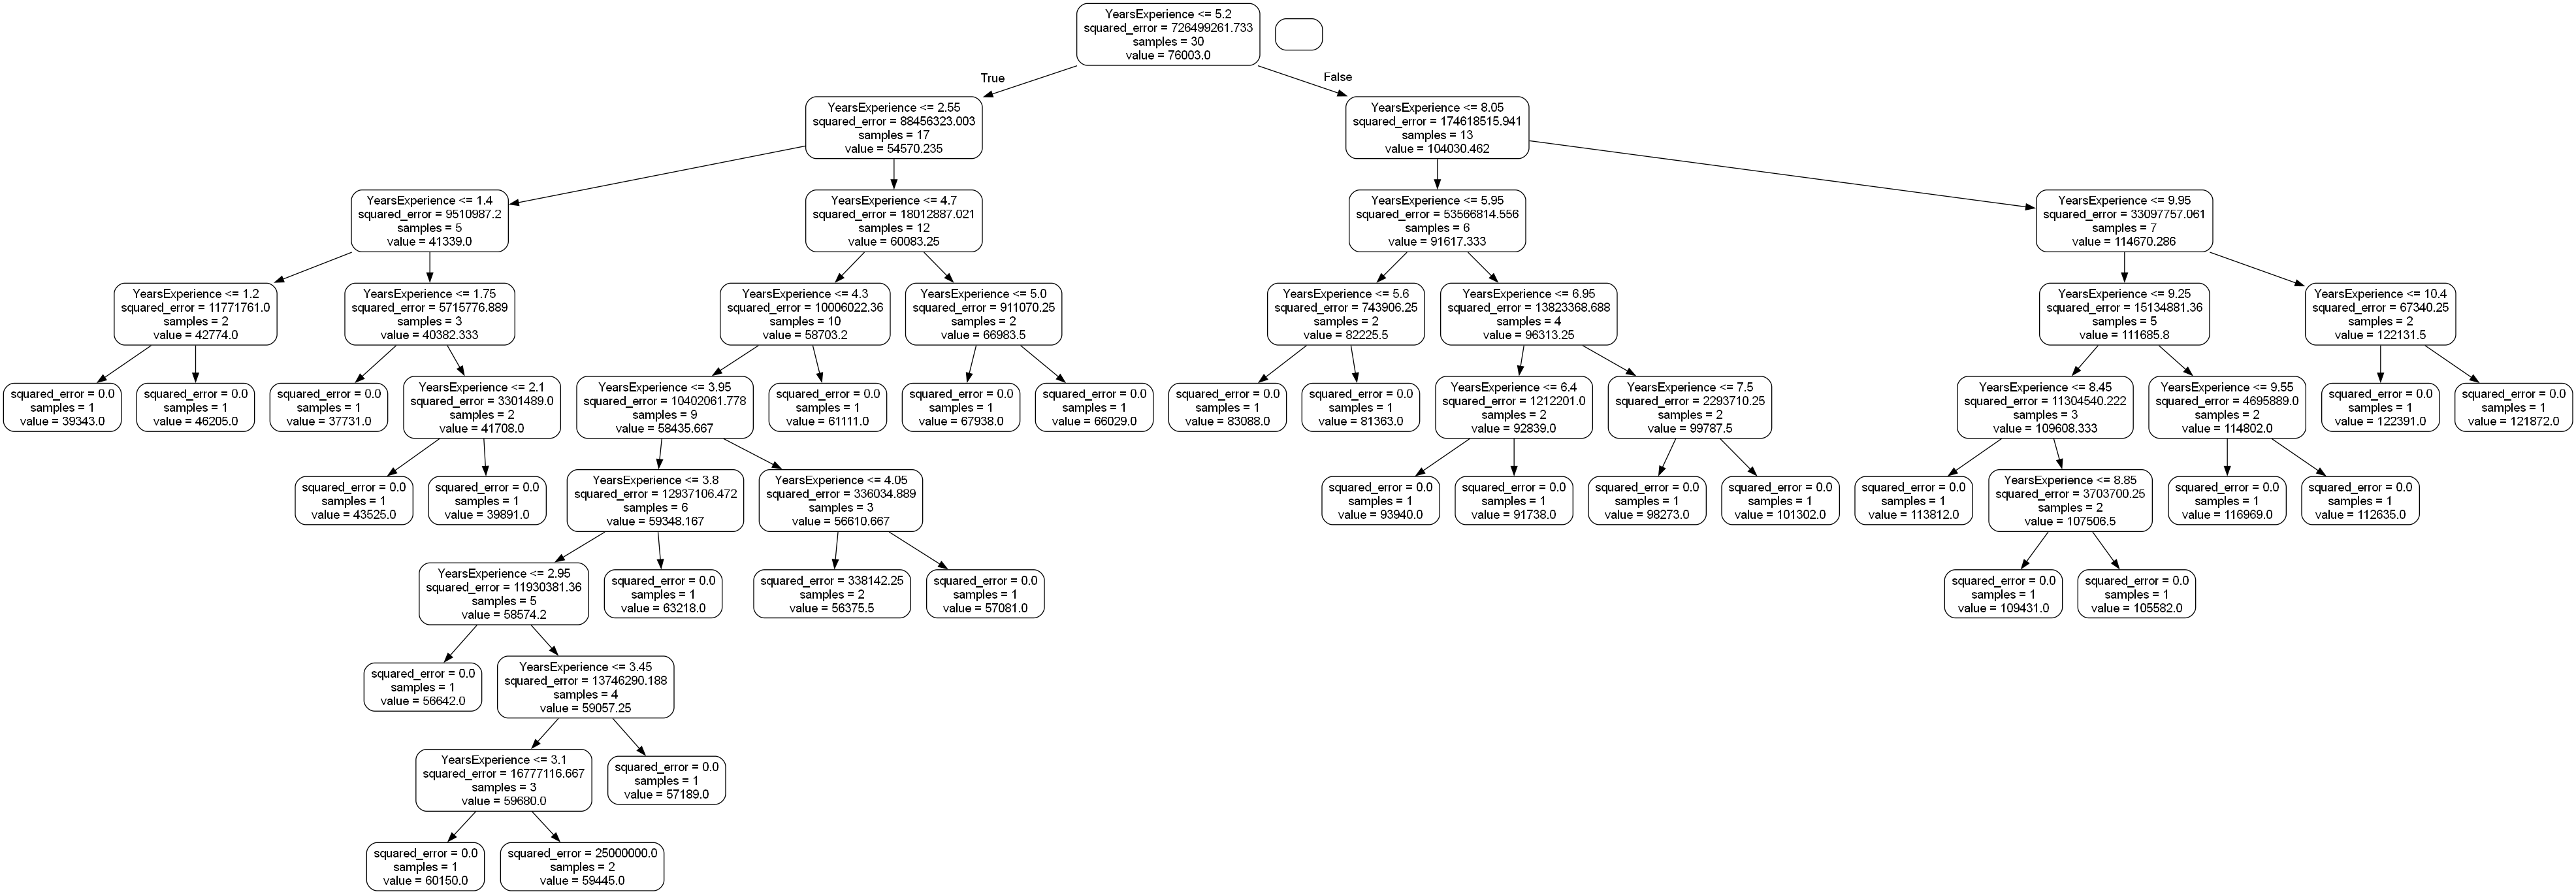

In [240]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(
    decision_tree = dtr,
    out_file = dot_data,
    rounded = True,
    feature_names = ['YearsExperience'],
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [241]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [242]:
db=pd.read_excel("multiple_linear_regression\startups_50.xlsx")
db.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [243]:
input=db.iloc[:,0:4]
output=db.iloc[:,4:5]

In [244]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(
       [
           ("one Hot Encoder",OneHotEncoder(),[3])
        ],
    remainder="passthrough",
)
input=ct.fit_transform(input)

In [245]:
input[:5]

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05]])

In [246]:
input=input[:,1:]
input[:5]

array([[0.0000000e+00, 1.0000000e+00, 1.6534920e+05, 1.3689780e+05,
        4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 1.6259770e+05, 1.5137759e+05,
        4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 1.5344151e+05, 1.0114555e+05,
        4.0793454e+05],
       [0.0000000e+00, 1.0000000e+00, 1.4437241e+05, 1.1867185e+05,
        3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 1.4210734e+05, 9.1391770e+04,
        3.6616842e+05]])

In [247]:
from sklearn.tree import DecisionTreeRegressor
dtr1=DecisionTreeRegressor(criterion="squared_error",max_depth=10)
dtr1.fit(input,output)

DecisionTreeRegressor(max_depth=10)

In [248]:
dtr1.score(input,output)

1.0

In [249]:
db1=pd.DataFrame({"R&D Spend":17534.5,"Administration":120075.23,"Marketing Spend":456133.25,"State":"Florida"},index=[0])
db1

,R&D Spend,Administration,Marketing Spend,State
0,17534.5,120075.23,456133.25,Florida


In [250]:
newx=db1.iloc[:,0:4]
newx=ct.transform(newx)
newx=newx[:,1:]
newx

array([[1.0000000e+00, 0.0000000e+00, 1.7534500e+04, 1.2007523e+05,
        4.5613325e+05]])

In [251]:
dtr1.predict(newx)

array([49490.75])

In [253]:
dtr1.feature_importances_

array([4.61010880e-04, 3.02818823e-05, 9.70816514e-01, 4.30532470e-03,
       2.43868688e-02])

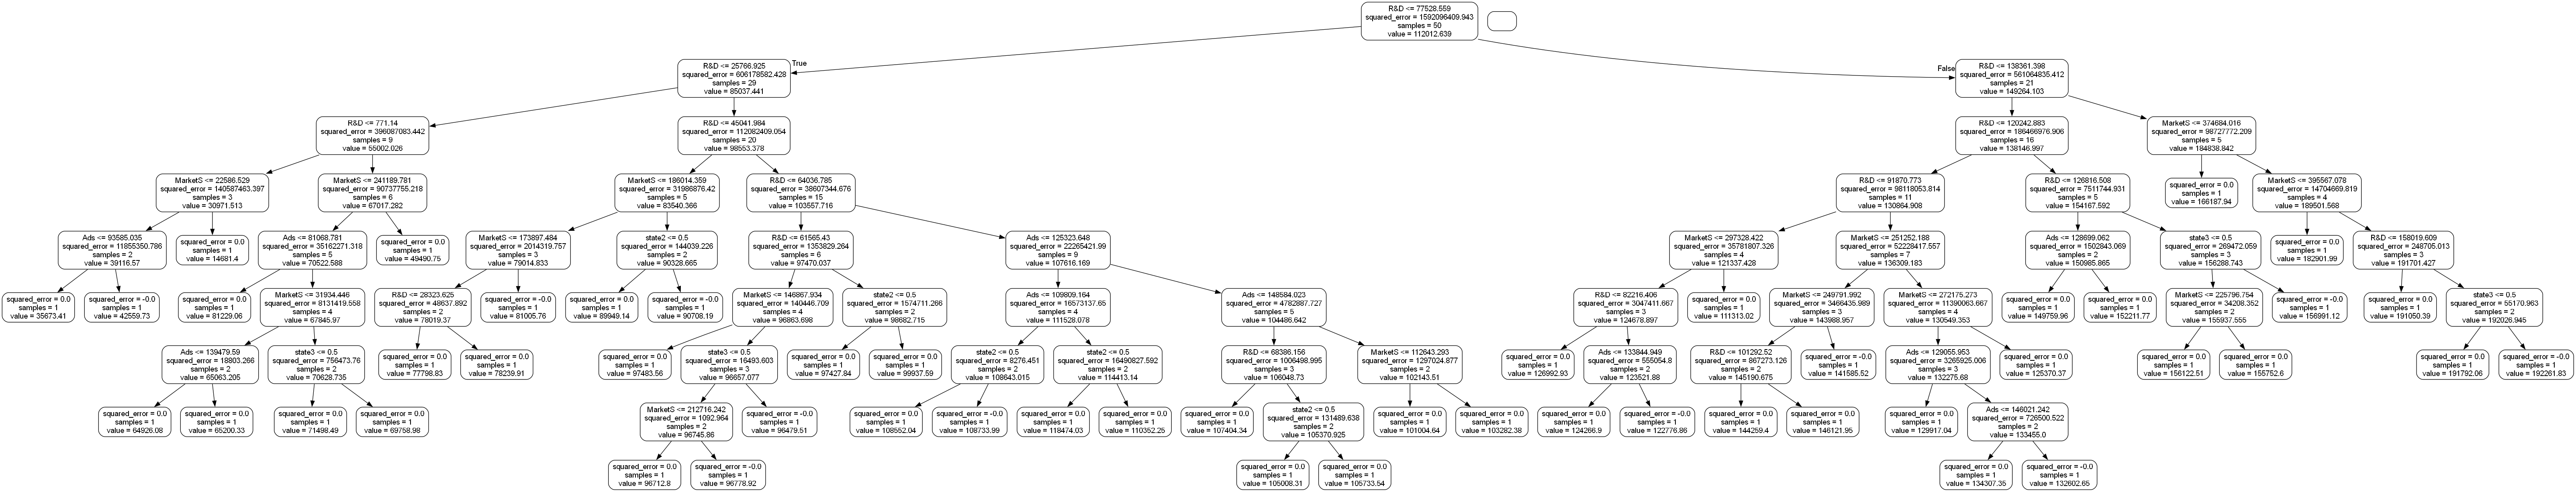

In [255]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(
    decision_tree = dtr1,
    out_file = dot_data,
    rounded = True,
    feature_names = ['state2', 'state3', 'R&D', 'Ads', 'MarketS'],
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())